In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

In [2]:
file_path = 'ccdefault.csv'

The dataset has 30,000 observations (rows) and 23 attributes (columns).  The row index (ID) column can be deleted.

- This dataset has imbalanced classes.
- LIMIT_BAL is a currency amount.

#### Target Variables
- The class variable (DEFAULT) is binary: 1 for defaults and 0 for non-defaults.
- There are 23,364 non-defaults and only 6,636 defaults observed.

#### Categorical Variables
- SEX, EDUCATION and MARRIAGE are categorical.

#### Numeric  Variables
- AGE.
- PAY_1 through PAY_6 categorical for the past six month's payment history.  
- BILL_AMT1 through BILL_AMT6 are the last 6 month's billing cycles.
- PAY_AMY1 through PAY_AMT6 are the paid amounts.


The dataset comes from: Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.  It can be found on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients Links to an external site.

In [3]:
def load_data(file_path):
    """
    Loads the credit card default data from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    A Pandas DataFrame containing the data.
    """
    
    # Load the dataset
    df = pd.read_csv(file_path, header=0)
    return df


In [4]:
def plot_corr_matrix(df):
    """
    Plots a correlation matrix for the given DataFrame.

    Parameters:
    df (DataFrame): The DataFrame for which to plot the correlation matrix.
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15,15))

    # Set font size
    sns.set(font_scale=1)

    # Plot correlation matrix
    sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8})
    
    plt.show()
    
    return ax

In [5]:
def split_data(df):
    """
    Splits the credit card default data into training and testing sets.

    Parameters:
    df (DataFrame): The credit card default data.

    Returns:
    X_train, X_test, y_train, y_test: The training and testing sets.
    """
    
    # Separate the features (X) and target (y) variables
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Converting to pandas df to plot later
#     X_train = df.iloc[:, :-1]
#     X_test = df.iloc[:, :-1]

    
    return X_train, X_test, y_train, y_test

In [6]:
def fit_rf(X_train, y_train, n_estimators):
    """
    Fits a random forest model with the given number of estimators.

    Parameters:
    X_train (ndarray): The training set features.
    y_train (ndarray): The training set target values.
    n_estimators (int): The number of trees in the forest.

    Returns:
    The fitted random forest classifier.
    """    

    # Convert X_train to a Pandas DataFrame
    X_train = X_train.to_frame()

    
    # Fit a random forest model
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)
    
    return rfc

In [7]:
def evaluate_rf(X_train, y_train):
    """
    Evaluates a random forest model using 10-fold cross-validation.

    Parameters:
    X_train (ndarray): The training set features.
    y_train (ndarray): The training set target values.
    """
    # Create random forest classifier
    rf = RandomForestClassifier(random_state=42)

    # Define parameter grid
    param_grid = {'n_estimators': [10,50,100,200,300,400,500]} #,
#                   'max_depth': [3,5,7,None],
#                   'max_features': ['sqrt', 'log2', None],
#                   'min_samples_split': [2, 5, 10],
#                   'min_samples_leaf': [3,4,5,6]}

    # Perform grid search with cross-validation
    start_time = datetime.now()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=1, verbose=2)
    grid_search.fit(X_train, y_train)
    end_time = datetime.now()    
    
    # Print the elapsed time
    elapsed_time = end_time - start_time
    print(f"Elapsed time: {elapsed_time.total_seconds():.3f} seconds")

    # Display best estimator parameters
    print('Best estimator parameters:')
    print(grid_search.best_estimator_.get_params())

    # Print statistics
    mean_scores = grid_search.cv_results_['mean_test_score']
    scores = np.array(mean_scores).reshape(len(param_grid['n_estimators'])) #,
#                                             len(param_grid['max_depth']),
#                                             len(param_grid['max_features']),
#                                             len(param_grid['min_samples_split']),
#                                             len(param_grid['min_samples_leaf']))
    print('Statistics:')
    print(scores)
    
    # Plot accuracy with increasing number of estimators
    plt.figure(figsize=(8, 6))
    sns.set_style('whitegrid')
    sns.lineplot(x=param_grid['n_estimators'], y=grid_search.cv_results_['mean_test_score'], color='blue')
    plt.xlabel('Number of estimators', fontsize=14)
    plt.ylabel('In-sample accuracy', fontsize=14)
    plt.title('Random Forest Model Performance', fontsize=16)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()

    return grid_search

In [8]:
def plot_feature_importance(rfc, feature_names):
    """
    Plots the feature importance for a given random forest model.

    Parameters:
    rfc (RandomForestClassifier): The random forest classifier.
    feature_names (list): The list of feature names.
    """
    
    # Display feature importance for best model
    importances = rfc.feature_importances_
    importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    importance_df = importance_df.sort_values('importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.set_style('whitegrid')
    sns.barplot(x='importance', y='feature', data=importance_df, palette='deep')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

There are no null values in the dataset.

Data types:
ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object
Statistics:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000     

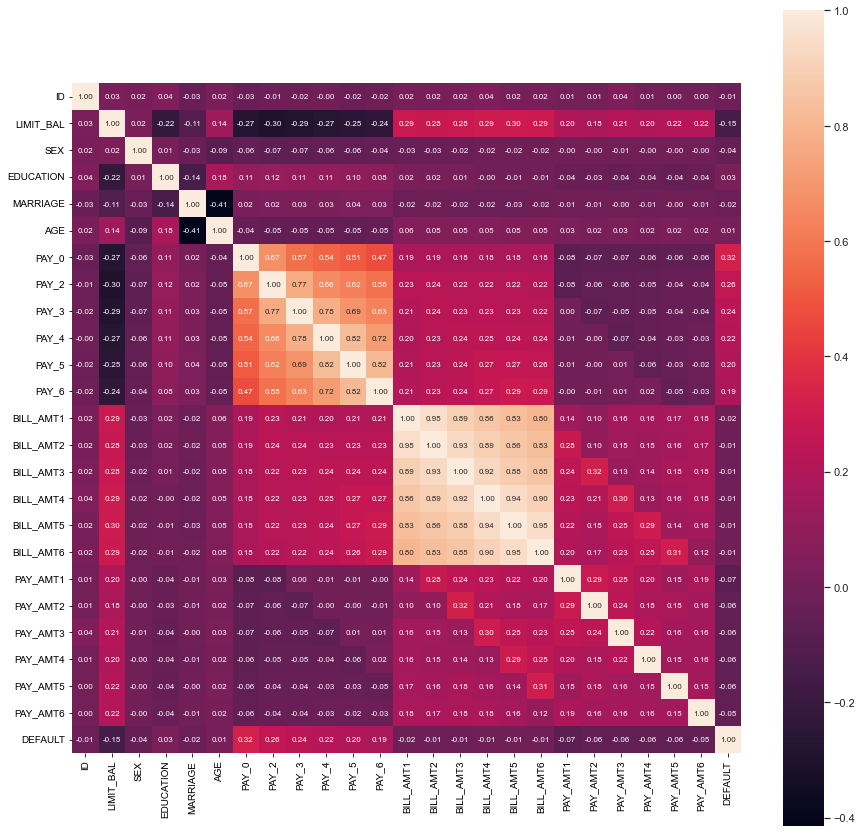

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.5s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=10; total time=   0.4s
[CV] END ....................................n_estimators=50; total time=   2.1s
[CV] END ....................................n_e

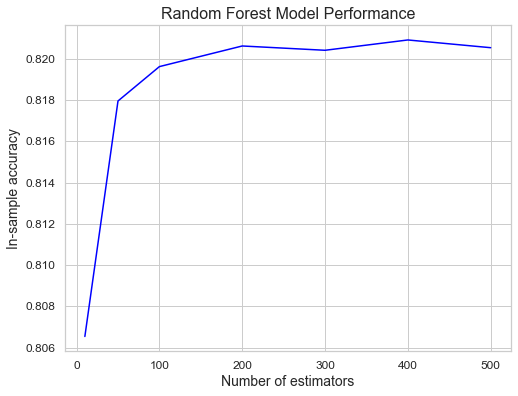

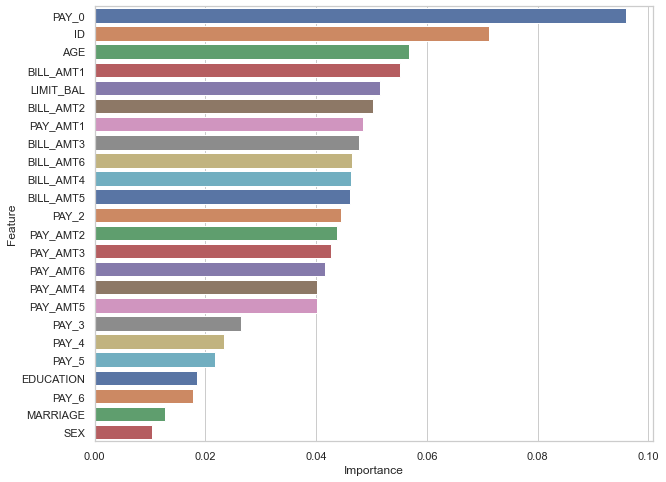

In [9]:
if __name__ == '__main__':
    # Load the data
    df = load_data('ccdefault.csv')

    # Check for null values
    if df.isnull().sum().sum() == 0:
        print('There are no null values in the dataset.\n')
    else:
        print('Number of null values per column:')
        print(df.isnull().sum())

    # Print data types
    print('Data types:')
    print(df.dtypes)

    # Describe the data
    print('Statistics:')
    print(df.describe())

    # Plot correlation matrix
    ax = plot_corr_matrix(df)
    plt.show()
    
    # Split the data
    X_train, X_test, y_train, y_test = split_data(df)


    # Evaluate the random forest model
    grid_search = evaluate_rf(X_train, y_train)

#     # Print statistics
#     print('Statistics:')
#     print(grid_search.cv_results_['mean_test_score'].reshape(4, 2))

    # Display feature importance
    plot_feature_importance(grid_search.best_estimator_, X_train.columns)

#### Conclusion

a) We found that increasing the number of estimators in the random forest model led to higher in-sample accuracies, but also increased computation time. 

b) The optimal number of estimators for our forest was 50. 

c) The most important features in predicting credit card default were repayment status and age of the client. 

d) Feature importance in random forests is calculated by measuring the reduction in impurity (e.g., Gini index) when a feature is used for splitting.

In [10]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
